# SALARY PREDICTION USING LINEAR REGRESSION ALGORITHM 

# PROBLEM STATEMENT : 
### Predict the salaries of the employees from a given dataset that includes their gross and annual salaries.

#### Importing all the necessary libraries needed for the prediction.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

###### Utilising the pandas package to read the csv dataset

In [2]:
df = pd.read_csv('Dataset.csv')

In [3]:
df

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,$11310.00,$873.63
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,$53428.00,$52868.38
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,$68300.00,$67439.19
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,$62000.00,$58654.74
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,$43999.00,$39686.95
...,...,...,...,...,...,...,...
18976,"Zotamou,Jean Marie D",AIDE BLUE CHIP,W02235,Youth Summer,05/21/2014,$11310.00,NaN
18977,"Zotamou,Pivot D",AIDE BLUE CHIP,W02629,Youth Summer,05/21/2014,$11310.00,NaN
18978,"Zovistoski,Zachary D",POLICE OFFICER TRAINEE,A99416,Police Department,12/17/2013,$43999.00,$21070.03
18979,"Zubyk,Stanislav T",POLICE OFFICER,A99262,Police Department,01/23/2013,$44104.00,$48608.12


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18981 entries, 0 to 18980
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0    Name         18981 non-null  object
 1   JobTitle      18981 non-null  object
 2   AgencyID      18981 non-null  object
 3   Agency        18981 non-null  object
 4   HireDate      18911 non-null  object
 5   AnnualSalary  18981 non-null  object
 6   GrossPay      15758 non-null  object
dtypes: object(7)
memory usage: 1.0+ MB


In [5]:
df.isnull().sum() # Searching for empty values.

 Name              0
JobTitle           0
AgencyID           0
Agency             0
HireDate          70
AnnualSalary       0
GrossPay        3223
dtype: int64

# DATA PREPROCESSING 

In [6]:
salary_pred_cpy = df.copy() # making a copy of the dataset.

In [7]:
salary_pred_cpy.columns # checking  for only necessary Columns. 

Index([' Name', 'JobTitle', 'AgencyID', 'Agency', 'HireDate', 'AnnualSalary',
       'GrossPay'],
      dtype='object')

In [8]:
salary_pred_cpy=salary_pred_cpy.drop(' Name',axis=1) # Droping Name Column as it is of no use for prediction.

In [9]:
salary_pred_cpy = salary_pred_cpy.dropna(subset=['HireDate']) # Only Droping rows Which Have HireDate Value as NaN 


In [10]:
salary_pred_cpy=salary_pred_cpy.drop('GrossPay',axis=1) #Droping GrossPay Column


In [11]:
salary_pred_cpy.isnull().sum() 

JobTitle        0
AgencyID        0
Agency          0
HireDate        0
AnnualSalary    0
dtype: int64

In [12]:
salary_pred_cpy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18911 entries, 0 to 18980
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   JobTitle      18911 non-null  object
 1   AgencyID      18911 non-null  object
 2   Agency        18911 non-null  object
 3   HireDate      18911 non-null  object
 4   AnnualSalary  18911 non-null  object
dtypes: object(5)
memory usage: 886.5+ KB


In [13]:
salary_pred_cpy['AnnualSalary']=salary_pred_cpy['AnnualSalary'].apply(lambda x : float(str(x)[1:])) # Removing $ sign in the Annual Salary Columns

In [14]:
salary_pred_cpy['AnnualSalary']

0        11310.0
1        53428.0
2        68300.0
3        62000.0
4        43999.0
          ...   
18976    11310.0
18977    11310.0
18978    43999.0
18979    44104.0
18980    53568.0
Name: AnnualSalary, Length: 18911, dtype: float64

In [15]:
salary_pred_cpy['month']=salary_pred_cpy['HireDate'].apply(lambda x : int(str(x[0:2]))) # HireDate is divided into day month year 
salary_pred_cpy['day']=salary_pred_cpy['HireDate'].apply(lambda x : int(str(x[3:5])))
salary_pred_cpy['year']=salary_pred_cpy['HireDate'].apply(lambda x : int(str(x[6:])))
salary_pred_cpy

,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,month,day,year
0,AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,11310.0,6,10,2013
1,Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,53428.0,10,24,1979
2,ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,68300.0,9,25,2006
3,EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,62000.0,7,23,2009
4,POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,43999.0,7,24,2013
...,...,...,...,...,...,...,...,...
18976,AIDE BLUE CHIP,W02235,Youth Summer,05/21/2014,11310.0,5,21,2014
18977,AIDE BLUE CHIP,W02629,Youth Summer,05/21/2014,11310.0,5,21,2014
18978,POLICE OFFICER TRAINEE,A99416,Police Department,12/17/2013,43999.0,12,17,2013
18979,POLICE OFFICER,A99262,Police Department,01/23/2013,44104.0,1,23,2013


In [16]:
salary_pred_cpy.JobTitle.value_counts() 

AIDE BLUE CHIP                    4817
POLICE OFFICER                    1866
LABORER (Hourly)                   597
EMT Firefighter Suppression        358
CROSSING GUARD                     337
                                  ... 
PUBLIC INFORMATION OFFICER SAO       1
STREET MASON                         1
DESIGN PLANNER I                     1
FUEL SYSTEMS SPECIALIST              1
Research Analyst II                  1
Name: JobTitle, Length: 1073, dtype: int64

In [17]:
salary_pred_cpy.Agency.value_counts()

Youth Summer                4323
Police Department           3141
Fire Department             1576
DPW-Water & Waste Water     1491
HLTH-Health Department       833
                            ... 
Council Services               6
HLTH-Health Dept Locatio       6
Legislative Reference          5
M-R Cable & Comm               4
Special City Services          4
Name: Agency, Length: 65, dtype: int64

In [18]:
salary_pred_cpy.AgencyID.value_counts() #one agency is having multiple agency ids 

P04001    316
C90786    276
W02629    193
P04002    191
A99416    166
         ... 
W02525      1
W02400      1
A64005      1
W02666      1
W02339      1
Name: AgencyID, Length: 1177, dtype: int64

In [19]:
salary_pred_cpy.AnnualSalary.value_counts()

11310.0    4811
20800.0     325
29245.0     196
43999.0     169
44773.0     162
           ... 
58227.0       1
41704.0       1
44700.0       1
43000.0       1
900.0         1
Name: AnnualSalary, Length: 1590, dtype: int64

In [20]:
salary_pred_cpy.HireDate.value_counts()

05/21/2014    1478
06/10/2013     696
06/12/2012     541
06/07/2011     368
05/29/2014     347
              ... 
02/13/2009       1
08/12/1993       1
02/09/1998       1
05/06/1980       1
10/15/1979       1
Name: HireDate, Length: 4737, dtype: int64

<AxesSubplot:>

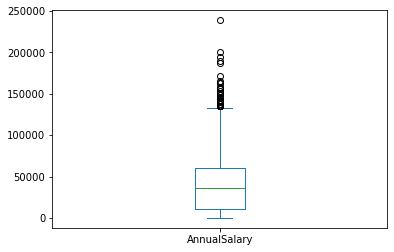

In [21]:
salary_pred_cpy.AnnualSalary.plot.box()

In [22]:
salary_pred_cpy.AnnualSalary.describe()

count     18911.000000
mean      39660.421889
std       25163.465942
min           0.000000
25%       11310.000000
50%       36203.000000
75%       60300.000000
max      238772.000000
Name: AnnualSalary, dtype: float64

In [23]:
salary_pred_cpy=salary_pred_cpy[salary_pred_cpy['AnnualSalary']<135000] # Removing the outliers
# An outlier is a data point that is noticeably different from the rest.
                                            

<AxesSubplot:>

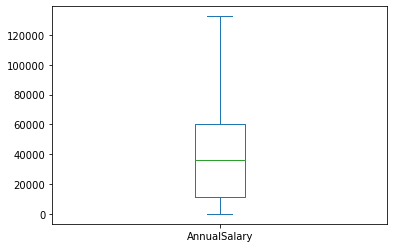

In [24]:
salary_pred_cpy.AnnualSalary.plot.box()

In [25]:
salary_pred_cpy.AnnualSalary.describe()

count     18872.000000
mean      39426.790713
std       24637.332423
min           0.000000
25%       11310.000000
50%       36203.000000
75%       60200.000000
max      132600.000000
Name: AnnualSalary, dtype: float64

# DISCOVERING THE PATTERNS AND ANALYSING THE DATASET

<Figure size 3600x3600 with 0 Axes>

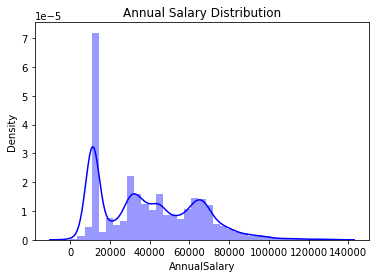

<Figure size 3600x3600 with 0 Axes>

In [26]:
#CHECK THE DISTRIBUTION OF ANNUAL SALARY

sns.distplot(salary_pred_cpy.AnnualSalary,color='Blue')
plt.title('Annual Salary Distribution')
plt.figure(figsize=(50,50))

(array([    0.,  5000., 10000.]), [])

<Figure size 3600x3600 with 0 Axes>

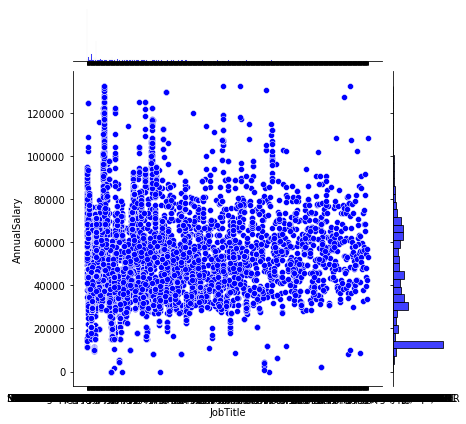

In [27]:
plt.figure(figsize=(50,50))
sns.jointplot(x='JobTitle',y='AnnualSalary',data = salary_pred_cpy,color='Blue')
plt.xticks(rotation = 90,color='Black')

Text(0.5, 1.0, 'Top 5 Jobs')

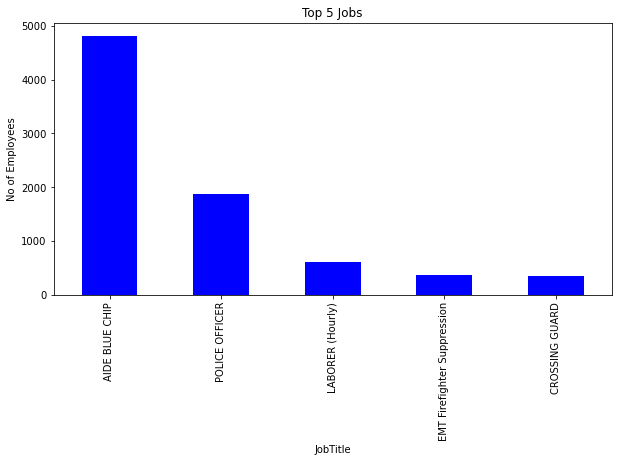

In [28]:
 # Top 5 Jobs Which Are Likely To Be Hired 
    
plt.figure(figsize=(10,5))
salary_pred_cpy.groupby(['JobTitle'])['JobTitle'].count().sort_values(ascending = False ).head(5).plot.bar(color='Blue')
plt.ylabel('No of Employees')
plt.title('Top 5 Jobs')

Text(0.5, 1.0, 'Top 5 Paying Jobs')

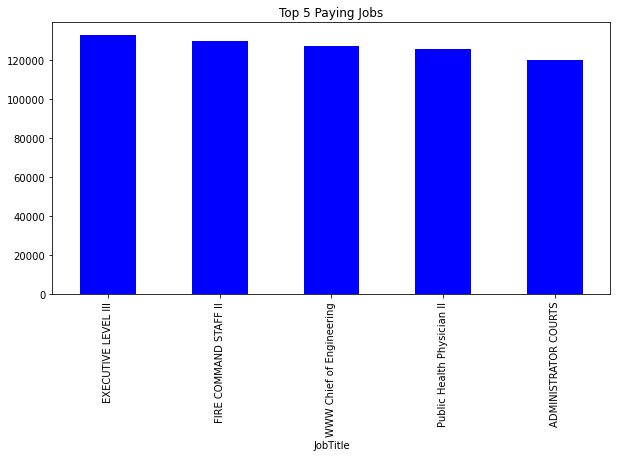

In [29]:
# Top 5 Highest Paying Jobs 

plt.figure(figsize=(10,5))
salary_pred_cpy.groupby(['JobTitle'])['AnnualSalary'].mean().sort_values(ascending=False).head(5).plot.bar(color='Blue')
plt.title('Top 5 Paying Jobs')

In [30]:
#Average Salary Offered 

mean_salary = salary_pred_cpy.AnnualSalary.mean()
mean_salary

39426.79071322594

In [31]:
#How Many Jobs Are There with salary greater than avg salary

x=salary_pred_cpy.groupby(['JobTitle'])['AnnualSalary'].mean().reset_index()
x

,JobTitle,AnnualSalary
0,911 LEAD OPERATOR,47886.000000
1,911 OPERATOR,42835.743590
2,911 OPERATOR SUPERVISOR,54797.500000
3,ACCOUNT EXECUTIVE,42960.000000
4,ACCOUNTANT I,46316.642857
...,...,...
1062,ZONING ADMINISTRATOR,82100.000000
1063,ZONING APPEALS ADVISOR BMZA,59274.000000
1064,ZONING ENFORCEMENT OFFICER,62000.000000
1065,ZONING EXAMINER I,43674.000000


In [32]:
x[x['AnnualSalary']>mean_salary]['JobTitle'].count()

808

Text(0.5, 1.0, 'Top 5 Agencies')

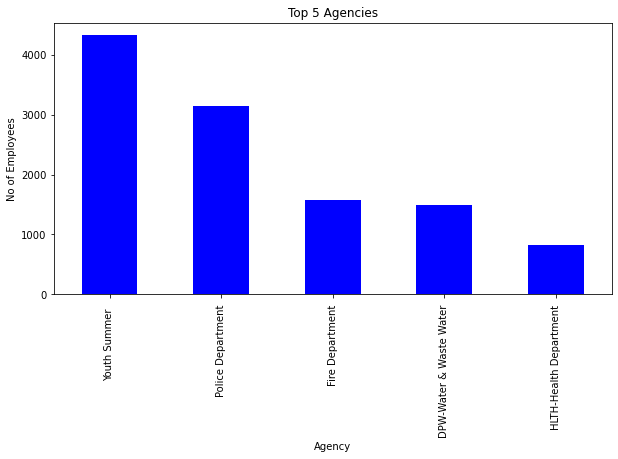

In [33]:
#Top 5 Agencies that have hired Higher No of Employees 

plt.figure(figsize=(10,5))
salary_pred_cpy.groupby(['Agency'])['HireDate'].count().sort_values(ascending=False).head(5).plot.bar(color='Blue')
plt.ylabel('No of Employees')
plt.title('Top 5 Agencies')

Text(0.5, 1.0, 'Top 5 AgencyIDs With Highest No of Employees')

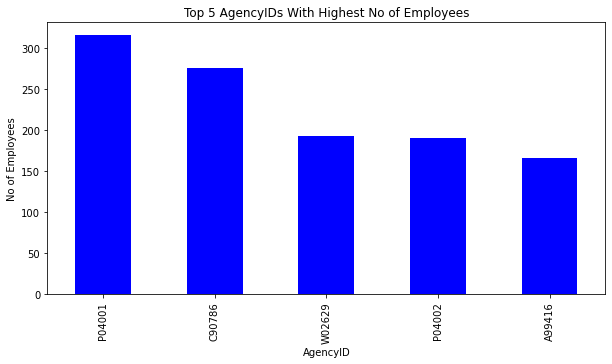

In [34]:
# Which AgencyId Have Higher No Of PPl working For 

plt.figure(figsize=(10,5))
salary_pred_cpy.groupby(['AgencyID'])['HireDate'].count().sort_values(ascending=False).head(5).plot.bar(color='Blue')
plt.ylabel('No of Employees')
plt.title('Top 5 AgencyIDs With Highest No of Employees')

In [35]:
# Relation b/w Year and Salary 

salary_pred_cpy.head()

,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,month,day,year
0,AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,11310.0,6,10,2013
1,Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,53428.0,10,24,1979
2,ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,68300.0,9,25,2006
3,EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,62000.0,7,23,2009
4,POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,43999.0,7,24,2013


<AxesSubplot:xlabel='year', ylabel='AnnualSalary'>

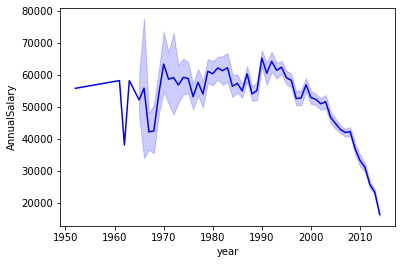

In [36]:
sns.lineplot(salary_pred_cpy['year'],salary_pred_cpy['AnnualSalary'],color='blue')

<AxesSubplot:xlabel='year'>

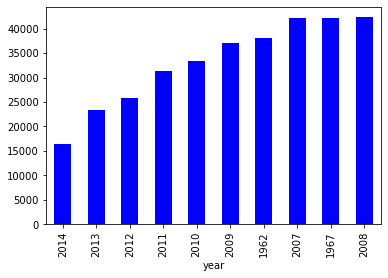

In [37]:
salary_pred_cpy.groupby(['year'])['AnnualSalary'].mean().sort_values().head(10).plot.bar(color='Blue')

<AxesSubplot:xlabel='month'>

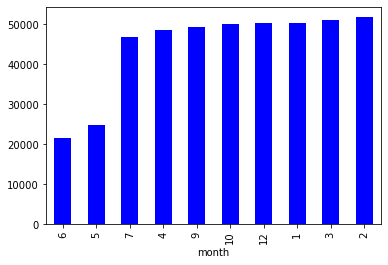

In [38]:
# Impact Of Month On Salary

salary_pred_cpy.groupby(['month'])['AnnualSalary'].mean().sort_values().head(10).plot.bar(color='Blue')



<AxesSubplot:xlabel='month'>

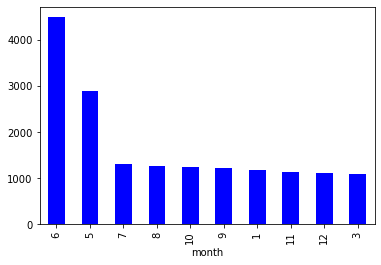

In [39]:
#Highest No Of PPl Hired on Which Month 

salary_pred_cpy.groupby(['month'])['AnnualSalary'].count().sort_values(ascending=False).head(10).plot.bar(color='Blue')
#From plot majority freshers are hired on the month 6th or 5th

## MultiVariate Analysis

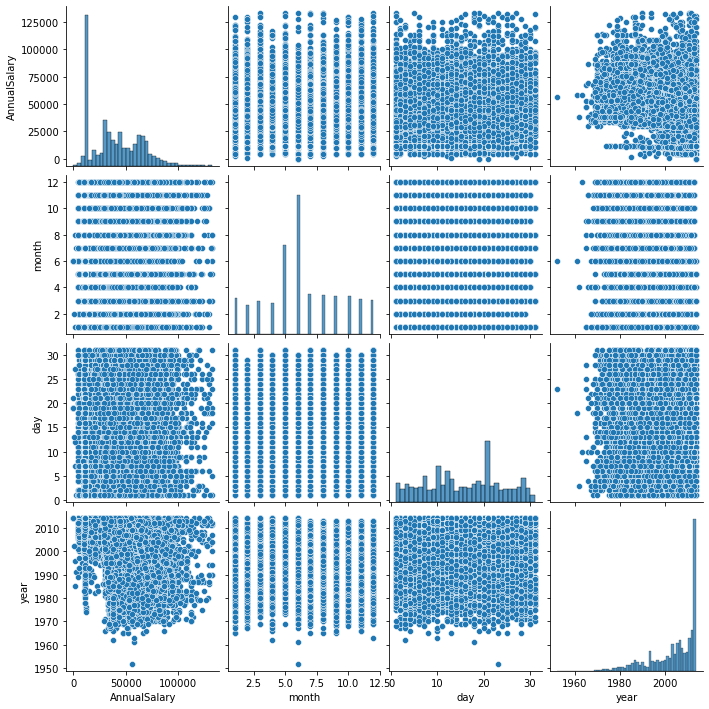

In [40]:
sns.pairplot(salary_pred_cpy)
# A pairs plot allows us to see both distribution of single variables and relationships between two variables 

<AxesSubplot:>

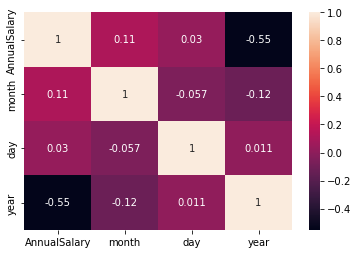

In [41]:
sns.heatmap(salary_pred_cpy.corr(),annot=True)

In [42]:
#Feature Engineering 

Mean_Job = salary_pred_cpy.groupby(['JobTitle'])['AnnualSalary'].mean()
Mean_Job 

JobTitle
911 LEAD OPERATOR              47886.000000
911 OPERATOR                   42835.743590
911 OPERATOR SUPERVISOR        54797.500000
ACCOUNT EXECUTIVE              42960.000000
ACCOUNTANT I                   46316.642857
                                   ...     
ZONING ADMINISTRATOR           82100.000000
ZONING APPEALS ADVISOR BMZA    59274.000000
ZONING ENFORCEMENT OFFICER     62000.000000
ZONING EXAMINER I              43674.000000
ZONING EXAMINER II             53568.000000
Name: AnnualSalary, Length: 1067, dtype: float64

In [43]:
salary_pred_cpy['JobTitle']=salary_pred_cpy['JobTitle'].map(Mean_Job)
salary_pred_cpy.head()
# Mapoing Titles with The mean Salary For that title 

,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,month,day,year
0,11313.967200,W02200,Youth Summer,06/10/2013,11310.0,6,10,2013
1,47443.500000,A03031,OED-Employment Dev,10/24/1979,53428.0,10,24,1979
2,69750.666667,A29005,States Attorneys Office,09/25/2006,68300.0,9,25,2006
3,57940.000000,A65026,HLTH-Health Department,07/23/2009,62000.0,7,23,2009
4,44531.160494,A99416,Police Department,07/24/2013,43999.0,7,24,2013


In [44]:
Mean_Agency = salary_pred_cpy.groupby(['Agency'])['AnnualSalary'].mean()
Mean_Agency

Agency
COMP-Audits               65004.615385
COMP-Communication Ser    37876.966667
COMP-Comptroller's O      61513.772727
COMP-Real Estate          64279.875000
Circuit Court             56210.485214
                              ...     
TRANS-Towing              33920.215385
TRANS-Traffic             34172.489691
Youth Summer              11346.315789
Youth Summer              11310.270645
Youth Temp Adult          24202.971014
Name: AnnualSalary, Length: 65, dtype: float64

In [45]:
salary_pred_cpy['Agency']=salary_pred_cpy['Agency'].map(Mean_Agency)
salary_pred_cpy.head()

,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,month,day,year
0,11313.967200,W02200,11310.270645,06/10/2013,11310.0,6,10,2013
1,47443.500000,A03031,50986.250000,10/24/1979,53428.0,10,24,1979
2,69750.666667,A29005,64874.560224,09/25/2006,68300.0,9,25,2006
3,57940.000000,A65026,39746.221420,07/23/2009,62000.0,7,23,2009
4,44531.160494,A99416,61456.643609,07/24/2013,43999.0,7,24,2013


In [46]:
Mean_AgencyID = salary_pred_cpy.groupby(['AgencyID'])['AnnualSalary'].mean()
Mean_AgencyID

AgencyID
A01001    58253.577662
A01020    80547.000000
A01030    70712.125000
A02001    66376.466667
A02002    42858.372549
              ...     
W02698    11310.000000
W02699    11310.000000
W07900    24515.227273
W07901    21840.000000
W07905    15080.000000
Name: AnnualSalary, Length: 1176, dtype: float64

In [47]:
salary_pred_cpy['AgencyID']=salary_pred_cpy['AgencyID'].map(Mean_AgencyID)
salary_pred_cpy.head()

,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,month,day,year
0,11313.967200,11310.000000,11310.270645,06/10/2013,11310.0,6,10,2013
1,47443.500000,46667.000000,50986.250000,10/24/1979,53428.0,10,24,1979
2,69750.666667,65926.133333,64874.560224,09/25/2006,68300.0,9,25,2006
3,57940.000000,48071.851064,39746.221420,07/23/2009,62000.0,7,23,2009
4,44531.160494,44012.307229,61456.643609,07/24/2013,43999.0,7,24,2013


In [48]:
salary_pred_cpy.drop('HireDate',axis=1,inplace=True)
salary_pred_cpy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18872 entries, 0 to 18980
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   JobTitle      18872 non-null  float64
 1   AgencyID      18872 non-null  float64
 2   Agency        18872 non-null  float64
 3   AnnualSalary  18872 non-null  float64
 4   month         18872 non-null  int64  
 5   day           18872 non-null  int64  
 6   year          18872 non-null  int64  
dtypes: float64(4), int64(3)
memory usage: 1.7 MB


# TRAINING THE DATA USING ML ALGORTIHM

In [49]:
#train 75%
#test 25%
#random state gives us to train 80% of data from all over the data (100%)
#frst 0 next 40 next 80 next 120 and so on , end , until 80% is trained 

train,test = train_test_split(salary_pred_cpy,test_size=0.25,random_state = 40)

In [50]:
y_train=train.pop('AnnualSalary')
x_train=train
y_train

15979    35207.0
16641    59409.0
2438     10339.0
15294    76360.0
4929     54510.0
          ...   
11620    63570.0
16167    11310.0
14598    49900.0
14652    11310.0
11678    32259.0
Name: AnnualSalary, Length: 14154, dtype: float64

In [51]:
y_test=test.pop('AnnualSalary')
x_test=test
y_test

10519    20800.0
1997     73013.0
14226    75288.0
584      11310.0
15603    11310.0
          ...   
16973    16640.0
3918     30229.0
17279    29245.0
15922    66167.0
14405    70698.0
Name: AnnualSalary, Length: 4718, dtype: float64

## FEATURE SCALING

In [52]:
#Feature scaling helps us to scale the data that all values or columns have equal weightage.

In [53]:
scaler = StandardScaler()
x_train[x_train.columns]=scaler.fit_transform(x_train[x_train.columns])

In [54]:
x_train

,JobTitle,AgencyID,Agency,month,day,year
15979,-0.196569,-0.231469,-0.249210,-1.821594,0.742793,-0.585138
16641,0.877149,0.987860,1.052408,1.901120,0.145639,0.377946
2438,-1.205407,-1.313149,-1.391194,1.901120,0.623362,-0.392521
15294,1.592483,0.952316,1.052408,-1.821594,-0.690376,-0.392521
4929,0.654129,0.632934,0.016627,1.901120,0.981655,-0.296213
...,...,...,...,...,...,...
11620,0.877149,1.039762,1.052408,-0.129451,-1.168099,0.281638
16167,-1.160146,-1.266321,-1.339875,-0.467880,0.623362,0.955796
14598,0.596007,0.746513,0.359754,-0.467880,0.862224,0.666871
14652,-1.160146,-1.266321,-1.339875,-0.467880,0.623362,0.955796


In [55]:
scaler = StandardScaler()
x_test[x_test.columns]=scaler.fit_transform(x_test[x_test.columns])

In [56]:
x_test

,JobTitle,AgencyID,Agency,month,day,year
10519,-0.751138,-0.800081,-0.879577,-0.113843,0.982859,0.181828
1997,1.241349,1.281630,1.506939,-1.138865,1.814631,-0.682277
14226,1.602313,1.316894,1.055525,-0.797191,0.507561,-0.394242
584,-1.178741,-1.288250,-1.357157,-0.113843,-1.512457,0.565874
15603,-1.178741,-1.288250,-1.357157,-0.113843,-0.443036,0.757898
...,...,...,...,...,...,...
16973,-0.678631,-0.800081,-0.879577,-0.113843,1.101683,0.757898
3918,-0.176333,-0.023215,0.452927,-0.455517,-0.443036,0.949921
17279,-0.402798,-0.366626,-0.393683,0.569505,-0.205387,0.181828
15922,1.174592,1.405804,1.506939,-1.138865,0.507561,0.181828


In [57]:
lr =LinearRegression()

In [58]:
salary_train = lr.fit(x_train,y_train)


In [59]:
y_pred=salary_train.predict(x_test)
y_pred

array([21630.22159376, 69304.4372736 , 77678.20175396, ...,
       29668.88447602, 66382.53351302, 63588.67230338])

In [60]:
y_test

10519    20800.0
1997     73013.0
14226    75288.0
584      11310.0
15603    11310.0
          ...   
16973    16640.0
3918     30229.0
17279    29245.0
15922    66167.0
14405    70698.0
Name: AnnualSalary, Length: 4718, dtype: float64

## PERCENTAGE ACCURACY IN PREDICTION 

In [61]:
from sklearn.metrics import r2_score

In [62]:
Percentage_accuracy=r2_score(y_test,y_pred)
Percentage_accuracy=Percentage_accuracy*100
Percentage_accuracy

96.75393522706277

## PERCENTAGE ERROR IN PREDICTION

In [63]:
Percentage_error=r2_score(y_test,y_pred)
Percentage_error=100-Percentage_error*100
Percentage_error

3.246064772937231

# CONCLUSION

### IDENTIFIED PATTERNS IN THE DATASET AND ESTIMATED OUTCOMES USING THESE DATA.